In [1]:
import tensorflow as tf


In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2025-01-12 10:12:36.128578: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-01-12 10:12:36.128642: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-01-12 10:12:36.128652: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-01-12 10:12:36.128760: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-12 10:12:36.128790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


True

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
#!pip install tensorflow-macos
##!pip install tensorflow-metal

# for linux
#nvidia-smi -l 1

In [5]:
import os
import cv2
root_path = os.getcwd()
train_path = root_path+"/cats_and_dogs_filtered/train"
val_path = root_path+"/cats_and_dogs_filtered/test"

ModuleNotFoundError: No module named 'cv2'

In [6]:
input_size = (64,64)
input_shape = (64,64,3)


def load_img(img_path):
    
    img = cv2.imread(img_path)
    img = cv2.resize(img,input_size)
    return img

#test = load_img("/Users/tharhtet/Documents/test2/cats_and_dogs_filtered/train/cats/cat.2159.jpg")
#test.shape

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



def load_dataset(val_path : str):
    
    cur_x, cur_y = [],[]
    for cur_class in os.listdir(val_path):
        label = ""
        if cur_class == "cats":
            label = [1,0]
        else:
            label = [0,1]

        for filename in os.listdir(val_path+"/"+cur_class):
            img_path = val_path+"/"+cur_class+"/"+filename
            img = load_img(img_path)
            cur_x.append(img)
            cur_y.append(label)

    return np.array(cur_x), np.array(cur_y)
            


ModuleNotFoundError: No module named 'cv2'

In [46]:
x_train, y_train = load_dataset(train_path)
x_val,y_val =  load_dataset(val_path)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)

x_train :  (2752, 64, 64, 3)
y_train :  (2752, 2)


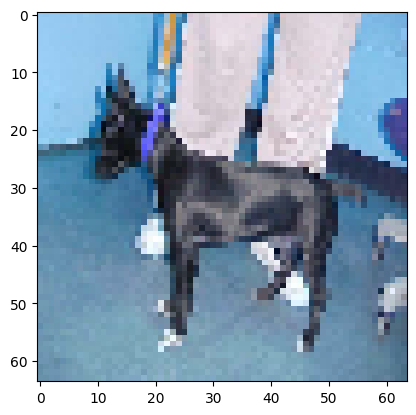

In [47]:
index = 20
plt.imshow(x_val[index])

In [48]:
#!rm /Users/tharhtet/Documents/test2/cats_and_dogs_filtered/train/.DS_Store

In [49]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(2,activation='softmax')
    
])

/opt/anaconda3/envs/dev_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,410 (6.20 MB)

 Trainable params: 1,625,410 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
parameters = (Filter_x x Filter_y * C_in + 1) * C_out

In [61]:
print((3 * 3 * 3 + 1) * 32)

print((3 * 3 * 32 + 1) * 64)

print(14 * 14 *  64)

# flatten
print( ( 12544 + 1) *128)


print((128 + 1) * 2)


print("total: ",896 + 18496  + 1605760 + 258)


896
18496
12544
1605760
258
total:  1625410


In [14]:
#!pip install pydot
#tensorflow.keras.utils.plot_model(model, show_shapes=True)

In [15]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

In [17]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data = (x_val,y_val),
    batch_size = 16,
    epochs = 10,
    verbose = 1
)

Epoch 1/10


2025-01-11 11:14:54.584149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


172/172 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5409 - loss: 67.7933 - val_accuracy: 0.5202 - val_loss: 0.7408
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7291 - loss: 0.5454 - val_accuracy: 0.5726 - val_loss: 0.8481
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8339 - loss: 0.3691 - val_accuracy: 0.5847 - val_loss: 1.0607
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9183 - loss: 0.2312 - val_accuracy: 0.5323 - val_loss: 1.1857
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9414 - loss: 0.1667 - val_accuracy: 0.5685 - val_loss: 2.1820
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9567 - loss: 0.1537 - val_accuracy: 0.5887 - val_loss: 1.5418
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9678 - loss: 0.1009 - val_accuracy: 0.5968 - val_loss: 1.9698
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9846 - loss: 0.0604 - val_accuracy: 0.53

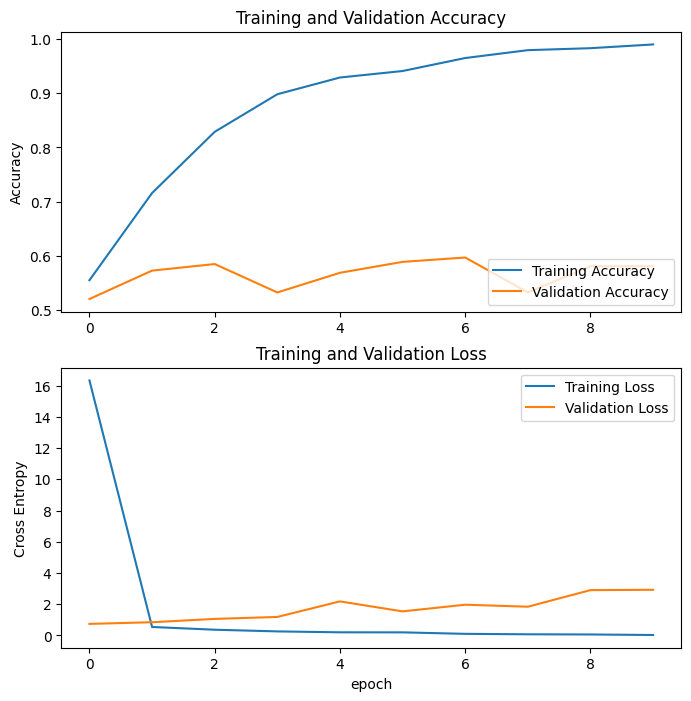

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

dogs
(1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
_pred :  [[1.28655255e-08 1.00000000e+00]]
_pred class:  dogs


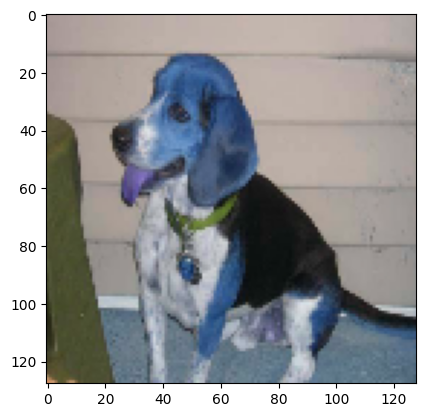

In [43]:
index = 10
test_label = y_train[index]
test_img = x_train[index]

labels =["cats","dogs"]
print(labels[np.argmax(test_label)])
plt.imshow(test_img)



sample_img = np.array([test_img])
print(sample_img.shape)



_pred = model.predict(sample_img)
print("_pred : ",_pred)

print("_pred class: ",labels[np.argmax(_pred)])

